<a href="https://colab.research.google.com/github/ukishore33/Analysing-cost-of-insurance-claims-post-an-unforeseen-event/blob/main/Insurance_Claims_Unforeseen_Events_ML_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Reading the Train, Test Data.

In [2]:
X_true=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/d')

In [3]:
X_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/X_train')

In [5]:
y_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/y_train')

In [6]:
X_test=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/X_test')

In [7]:
y_test=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/y_test')

In [11]:
X_train.isnull().sum()

Unnamed: 0    0
id            0
cat2          0
cat4          0
cat5          0
cat6          0
cat9          0
cat10         0
cat50         0
cat72         0
cat73         0
cat75         0
cat79         0
cat80         0
cat81         0
cat82         0
cat83         0
cat86         0
cat91         0
cat92         0
cat93         0
cat94         0
cat95         0
cat97         0
cat98         0
cat99         0
cat100        0
cat101        0
cat103        0
cat104        0
cat105        0
cat106        0
cat107        0
cat108        0
cat111        0
cat114        0
cat115        0
cont1         0
cont6         0
cont7         0
cont8         0
cont9         0
cont10        0
cont11        0
cont12        0
cont13        0
dtype: int64

In [15]:
X_train

,Unnamed: 0,id,cat2,cat4,cat5,cat6,cat9,cat10,cat50,cat72,...,cat115,cont1,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1.648736,-0.874098,1.465807,1.384930,-0.654233,-0.814900,-0.418705,-0.606245,-0.767652,...,-0.325686,-1.622250,-0.510417,-0.271608,0.133562,-1.061540,-0.934208,-0.191126,-0.237334,-0.651177
1,1,0.942233,1.144036,-0.682218,1.384930,-0.654233,1.227144,-0.418705,-0.606245,1.302674,...,0.893481,-0.300995,0.599124,0.247391,-0.255111,0.105694,0.309223,-0.463570,-0.502745,0.926796
2,2,-0.068198,-0.874098,-0.682218,1.384930,-0.654233,-0.814900,-0.418705,-0.606245,-0.767652,...,-0.325686,-0.262857,0.194589,1.432330,-0.572760,0.105694,-0.800531,1.718271,1.718985,-0.736195
3,3,1.177715,-0.874098,-0.682218,-0.722058,1.528508,-0.814900,-0.418705,1.649498,1.302674,...,-0.732075,-0.950279,-1.426974,-1.151977,-0.343313,-1.219813,-1.413603,-1.365173,-1.377647,-1.040337
4,4,1.683740,-0.874098,-0.682218,1.384930,-0.654233,-0.814900,-0.418705,-0.606245,-0.767652,...,1.299870,0.107277,1.022426,0.335364,1.964011,0.198406,0.628388,1.117651,1.058165,1.361574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131817,131817,0.474579,1.144036,-0.682218,-0.722058,-0.654233,1.227144,2.388318,-0.606245,1.302674,...,-0.325686,-0.827753,-0.617874,-0.615058,-0.136319,-1.061540,-0.718128,-1.183067,-1.200935,-0.534744
131818,131818,0.176868,1.144036,-0.682218,-0.722058,-0.654233,1.227144,2.388318,-0.606245,1.302674,...,-0.732075,0.022184,-0.681066,-0.674973,0.490088,-0.229174,-0.548958,-0.723158,-0.672669,-0.708089
131819,131819,0.696284,-0.874098,-0.682218,-0.722058,1.528508,-0.814900,-0.418705,1.649498,1.302674,...,-1.138464,-0.147755,-0.900811,-0.794029,-0.628564,-0.685063,-0.718128,-1.315367,-1.291907,-1.052702
131820,131820,0.971001,1.144036,-0.682218,-0.722058,-0.654233,1.227144,-0.418705,-0.606245,-0.767652,...,1.706260,-0.916688,-0.117410,-0.936976,0.634497,-0.780314,-0.634216,-0.551837,-0.588553,0.992984


In [24]:
X_true.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [22]:
X_train.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [23]:
X_test.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [18]:
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [21]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [20]:
y_test = np.array(y_test)
y_test = y_test.ravel()

## Machine Learning

Based on the problem statement, we can understand that we should do the analysis based on Regression based algorithms.

### Building the Algorithm

Linear Regression

In [25]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

KNN Algorithm

In [26]:
from sklearn.neighbors import KNeighborsRegressor

regression_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
regression_model.fit(X_train, y_train)

KNeighborsRegressor()

Decision Tree Regression

In [27]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
regression_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Making Predictions

Linear Regression

In [40]:
lr_pred = linear_reg.predict(X_test)

KNN Algorithm

In [41]:
knn_pred = regression_model.predict(X_test)

Decision Tree Regression

In [42]:
dt_pred =dt_reg.predict(X_test)

Random Forest

In [43]:
rf_pred = regression_model.predict(X_test)

## Model Evaluation

- Here we use mean squared error metrics and R2 Score metrics to measure the performance of the algorithm.
- Lesser the MSE and Higher the R2 Score Value Better the Performance of the algorithm

Linear Regression

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print('Mean Squared Error:', lr_mse)
print('Mean Absolute Error:', lr_mae)
print('R-squared Score:', lr_r2)

Mean Squared Error: 1154717638.5901175
Mean Absolute Error: 27811.591127414667
R-squared Score: 0.43309002748201464


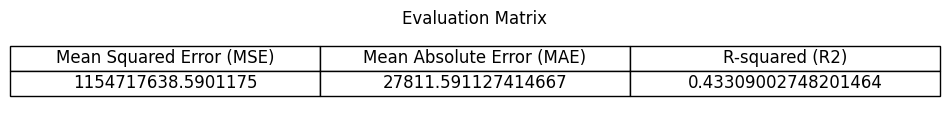

In [59]:
import matplotlib.pyplot as plt

lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[lr_mse,lr_mae, lr_r2]]
matrix_columns = ['Mean Squared Error (MSE)','Mean Absolute Error (MAE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()


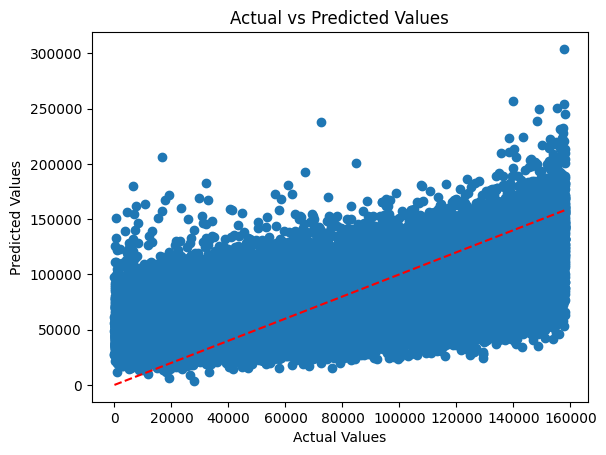

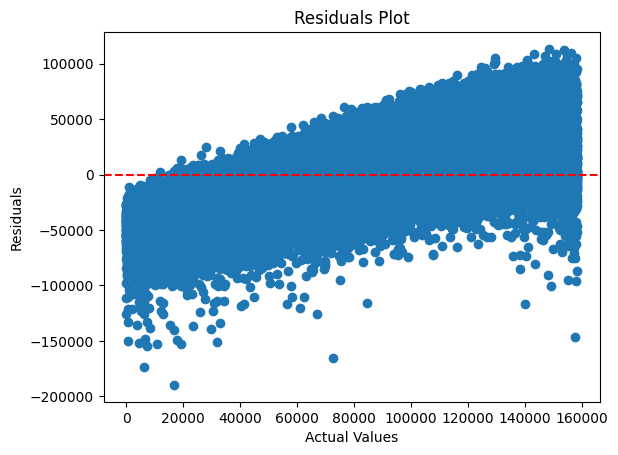

In [54]:
# Visualize the predicted vs actual values
plt.scatter(y_test, lr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualize the residuals
residuals = y_test - lr_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

KNN Algorithm

In [51]:
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print('Mean Squared Error:', knn_mse)
print('Mean Absolute Error:', knn_mae)
print('R-squared Score:', knn_r2)

Mean Squared Error: 1105989733.504987
Mean Absolute Error: 26537.583561578223
R-squared Score: 0.4570130493615445


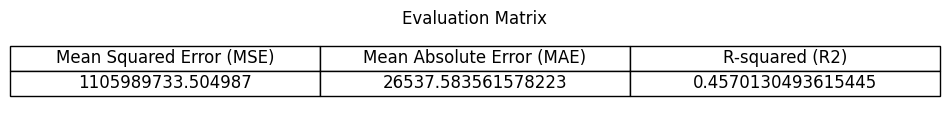

In [63]:
fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[knn_mse,knn_mae, knn_r2]]
matrix_columns = ['Mean Squared Error (MSE)','Mean Absolute Error (MAE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()


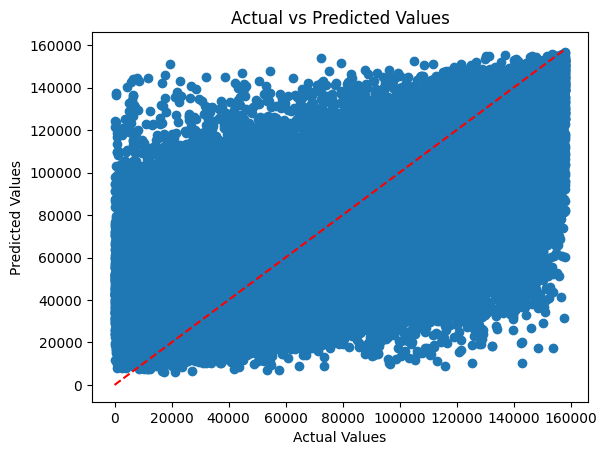

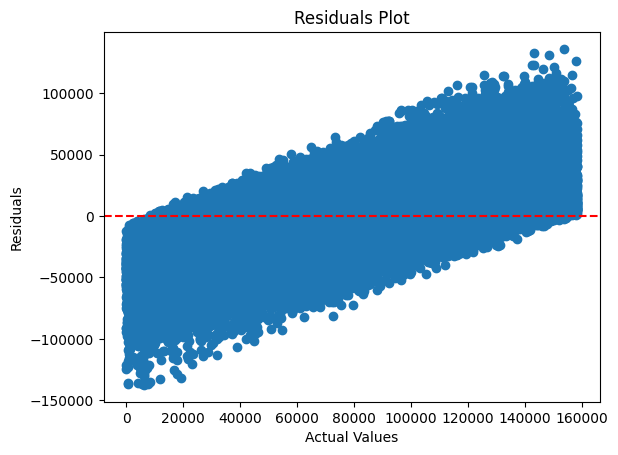

In [64]:
plt.scatter(y_test, knn_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - knn_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Decision Tree

In [52]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print('Mean Squared Error:', dt_mse)
print('Mean Absolute Error:', dt_mae)
print('R-squared Score:', dt_r2)

Mean Squared Error: 2146071250.2199535
Mean Absolute Error: 35818.14911304298
R-squared Score: -0.05361618531202761


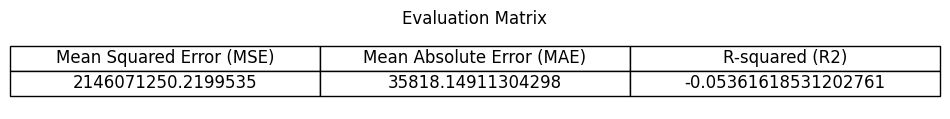

In [65]:
fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[dt_mse,dt_mae,dt_r2]]
matrix_columns = ['Mean Squared Error (MSE)','Mean Absolute Error (MAE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()


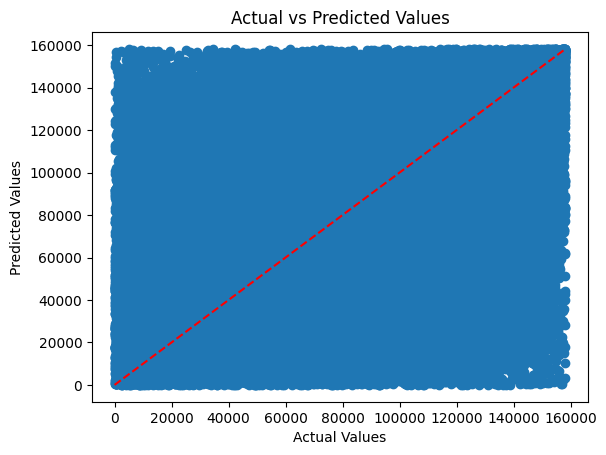

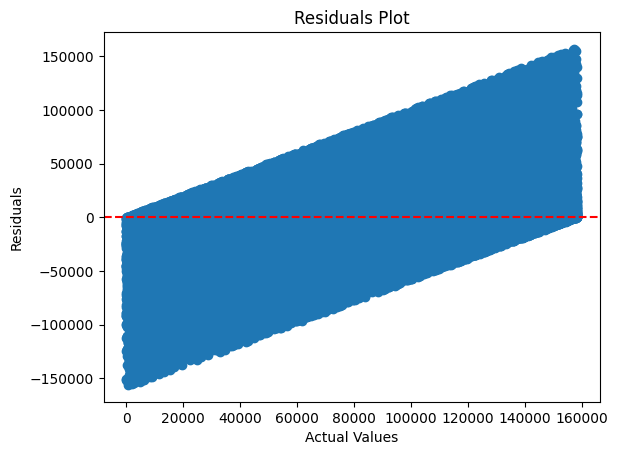

In [66]:
plt.scatter(y_test,dt_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - dt_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Random Forest

In [53]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Mean Squared Error:', rf_mse)
print('Mean Absolute Error:', rf_mae)
print('R-squared Score:', rf_r2)

Mean Squared Error: 1105989733.504987
Mean Absolute Error: 26537.583561578223
R-squared Score: 0.4570130493615445


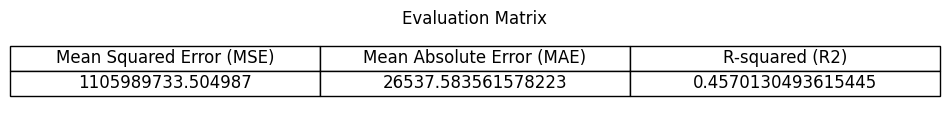

In [67]:
fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[rf_mse,rf_mae, rf_r2]]
matrix_columns = ['Mean Squared Error (MSE)','Mean Absolute Error (MAE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()


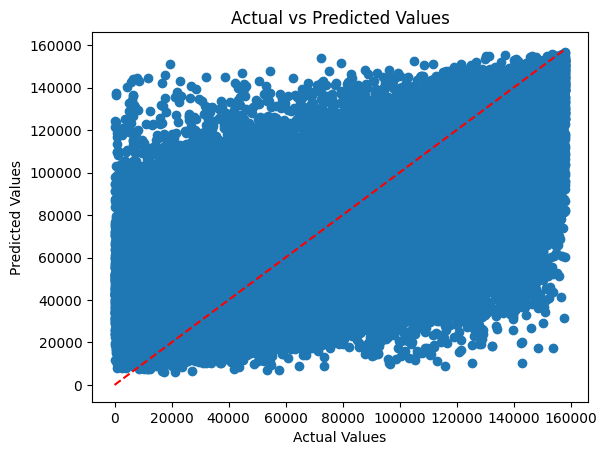

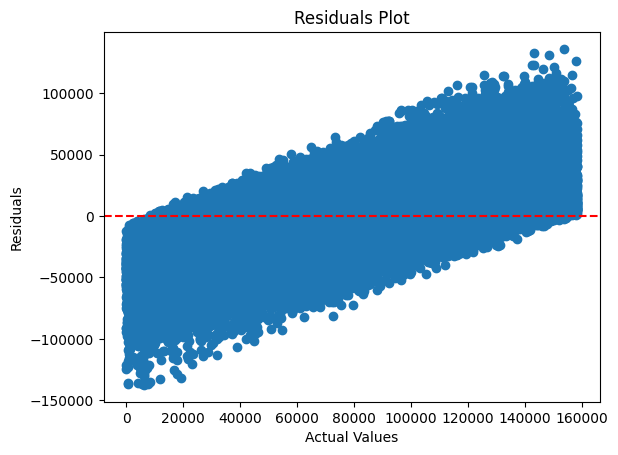

In [68]:
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y_test - rf_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#### Conclusion

#### Order of MSE Error
- Lesser the value of MSE Better the predictions.
- Random Forest = KNN Algorithm < Linear Regression < Decision Tree
- Here Random Forest And KNN Algorithm have equal chance of best predictions.

#### Order of MAE Error
- lesser the value of MAE Better the predictions.
- Random Forest = KNN Algorithm < Linear Regression < Decision Tree
- Here too Random Forest And KNN Algorithm have equal chance of best predictions.

#### Order of R - Squared Score
- More the value of R-Squared score Better the predictions.
- Random Forest = KNN Algorithm > Linear Regression > Decision Tree
- Here too Random Forest And KNN Algorithm have equal chance of best predictions.


Hence we conclude that Random Forest and KNN Algorithm have equally predict better predictions.

#### Making Predictions for X_true Dataset.

KNN Algorithm

In [69]:
knn_pred = linear_reg.predict(X_true)

In [71]:
knn_pred

array([ 56226.206698  ,  69012.9544928 , 158088.16582465, ...,
        83573.96521118,  38865.90791305, 101926.88015764])

Random Forest

In [70]:
rf_pred = linear_reg.predict(X_true)

In [72]:
rf_pred

array([ 56226.206698  ,  69012.9544928 , 158088.16582465, ...,
        83573.96521118,  38865.90791305, 101926.88015764])

- The Predictions of KNN Algorithm and Random Forest gives exactly same results.
- So the Y_true value which we predicted is knn_pred=rf_pred.